# Train model

In [1]:
batch_size=32
pickle_file='test_dataset_cluster_labeled.pickle'
limit_seq_len=100

In [2]:
from dataset import DwgDataset
dwg_dataset = DwgDataset(pickle_file=pickle_file, batch_size=batch_size, limit_seq_len=limit_seq_len)

In [3]:
lr=0.001
epochs=500
train_verbose=True

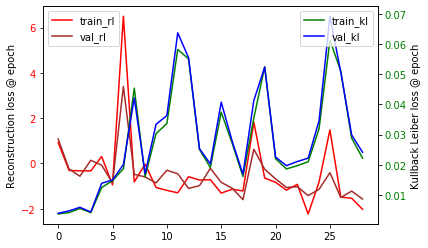

  [  29-   0 @   0.1 sec] RLoss: -1.63801 KL Loss: 0.0252
  [  29-   1 @   0.2 sec] RLoss: -2.05554 KL Loss: 0.0257
  [  29-   2 @   0.3 sec] RLoss: -1.51382 KL Loss: 0.0261
  [  29-   3 @   0.4 sec] RLoss: -1.60007 KL Loss: 0.0266
  [  29-   4 @   0.5 sec] RLoss: -1.34478 KL Loss: 0.0269
  [  29-   5 @   0.6 sec] RLoss: -2.06577 KL Loss: 0.0273
  [  29-   6 @   0.7 sec] RLoss: -2.41304 KL Loss: 0.0276
  [  29-   7 @   0.8 sec] RLoss: -1.92524 KL Loss: 0.0278
  [  29-   8 @   0.8 sec] RLoss: -1.92274 KL Loss: 0.0280


KeyboardInterrupt: 

In [4]:
from sketch_rnn import Trainer
from IPython.display import clear_output
from plot_graphics import plot_history

trainer = Trainer(
    dwg_dataset, 
    lr=lr, 
    train_verbose=train_verbose)

train_kl_losses = []
train_rl_losses = []
val_kl_losses  = []
val_rl_losses  = []

for epoch in range(epochs):
    clear_output(wait=True)
    
    plot_history(train_rl_losses, train_kl_losses, val_rl_losses, val_kl_losses)
    test_rl, test_kl, val_rl, val_kl = trainer.train_epoch(epoch)
    
    train_kl_losses.append(test_kl)
    train_rl_losses.append(test_rl)
    val_kl_losses.append(val_kl)
    val_rl_losses.append(val_rl)

# Calculate test accuracy
test_kl, test_rl = trainer.CalculateLoaderAccuracy(trainer.test_loader)
print('Test losses rl:{:1.4f} kl:{:1.4f}'.format(test_rl, test_kl))    